In [ ]:
import os
import glob
import time
import warnings
# import dataprep
# from dataprep.eda import plot
import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns

from numpy import mean, std
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# 1. Data processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.1. Import data.

In [ ]:
data_url = '/content/drive/MyDrive/36103_stds/assignment_1/TeleCom_Data-1.csv'
df = pd.read_csv(data_url, delimiter=None, header=None, skiprows=1)
columns = [
    "age",
    "job",
    "marital",
    "education",
    "default",
    "housing",
    "loan",
    "contact",
    "month",
    "day_of_week",
    "duration",
    "campaign",
    "pdays",
    "previous",
    "poutcome",
    "emp.var.rate",
    "cons.price.idx",
    "cons.conf.idx",
    "euribor3m",
    "nr.employed",
    "y"
]
df[columns] = df[0].str.split(";", expand=True)
df.drop(0, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             41180 non-null  object
 1   job             41180 non-null  object
 2   marital         41180 non-null  object
 3   education       41180 non-null  object
 4   default         41180 non-null  object
 5   housing         41180 non-null  object
 6   loan            41180 non-null  object
 7   contact         41180 non-null  object
 8   month           41180 non-null  object
 9   day_of_week     41180 non-null  object
 10  duration        41180 non-null  object
 11  campaign        41180 non-null  object
 12  pdays           41180 non-null  object
 13  previous        41180 non-null  object
 14  poutcome        41180 non-null  object
 15  emp.var.rate    41180 non-null  object
 16  cons.price.idx  41180 non-null  object
 17  cons.conf.idx   41180 non-null  object
 18  euribo

In [ ]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
35165,41,"""services""","""married""","""basic.6y""","""no""","""yes""","""no""","""cellular""","""may""","""fri""",...,10,999,0,"""nonexistent""",-1.8,92.893,-46.2,1.25,5099.1,"""no"""
7344,39,"""admin.""","""single""","""university.degree""","""unknown""","""no""","""no""","""telephone""","""may""","""fri""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.864,5191,"""no"""
26743,49,"""unemployed""","""unknown""","""high.school""","""no""","""yes""","""no""","""cellular""","""nov""","""thu""",...,1,999,0,"""nonexistent""",-0.1,93.2,-42,4.076,5195.8,"""no"""
18664,52,"""blue-collar""","""married""","""basic.9y""","""unknown""","""no""","""no""","""cellular""","""jul""","""thu""",...,3,999,0,"""nonexistent""",1.4,93.918,-42.7,4.968,5228.1,"""no"""
38643,27,"""blue-collar""","""single""","""basic.9y""","""no""","""no""","""no""","""cellular""","""nov""","""tue""",...,1,999,2,"""failure""",-3.4,92.649,-30.1,0.72,5017.5,"""yes"""


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             41180 non-null  object
 1   job             41180 non-null  object
 2   marital         41180 non-null  object
 3   education       41180 non-null  object
 4   default         41180 non-null  object
 5   housing         41180 non-null  object
 6   loan            41180 non-null  object
 7   contact         41180 non-null  object
 8   month           41180 non-null  object
 9   day_of_week     41180 non-null  object
 10  duration        41180 non-null  object
 11  campaign        41180 non-null  object
 12  pdays           41180 non-null  object
 13  previous        41180 non-null  object
 14  poutcome        41180 non-null  object
 15  emp.var.rate    41180 non-null  object
 16  cons.price.idx  41180 non-null  object
 17  cons.conf.idx   41180 non-null  object
 18  euribo

## 1.2. Standardize values and convert columns to suitable types.

In [ ]:
numeric_columns = [
    'age',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed',
]
boolean_col = [
    'default',
    'housing',
    'loan',
    "y"]

# standardize numeric columns
for col in numeric_columns:
    df[col] = df[col].astype(float)

# standardize categorical columns
categorical_features = [col for col in df.columns if col not in numeric_columns]
for col in categorical_features:
    df[col] = df[col].str.replace('\W', ' ').str.strip().str.lower()
    print(f'Unique values of {col} are:', df[col].unique())
    print('==='*10)

target = 'y'
categorical_features.remove(target)

<ipython-input-7-97b7b6cbeafc>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace('\W', ' ').str.strip().str.lower()


Unique values of job are: ['admin' 'services' 'blue collar' 'technician' 'housemaid' 'retired'
 'management' 'unemployed' 'self employed' 'unknown' 'entrepreneur'
 'student']
Unique values of marital are: ['married' 'single' 'divorced' 'unknown']
Unique values of education are: ['basic 6y' 'high school' 'basic 9y' 'professional course' 'unknown'
 'basic 4y' 'university degree' 'illiterate']
Unique values of default are: ['no' 'unknown' 'yes']
Unique values of housing are: ['no' 'yes' 'unknown']
Unique values of loan are: ['no' 'yes' 'unknown']
Unique values of contact are: ['telephone' 'cellular']
Unique values of month are: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique values of day_of_week are: ['mon' 'tue' 'wed' 'thu' 'fri']
Unique values of poutcome are: ['nonexistent' 'failure' 'success']
Unique values of y are: ['no' 'yes']


In [ ]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
36662,24.0,admin,single,university degree,no,no,no,cellular,jun,fri,...,2.0,999.0,0.0,nonexistent,-2.9,92.963,-40.8,1.268,5076.2,yes
34459,31.0,blue collar,single,basic 9y,no,yes,no,cellular,may,thu,...,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
10747,40.0,entrepreneur,married,basic 4y,unknown,yes,no,telephone,jun,tue,...,6.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
36011,40.0,student,single,high school,no,yes,no,cellular,may,tue,...,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
12454,56.0,retired,married,basic 4y,no,yes,no,cellular,jul,mon,...,2.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,yes


## 1.3. Check & drop duplicated data

In [ ]:
sum(df.duplicated())

12

In [ ]:
df.drop_duplicates(inplace=True)

## 1.4. Deal with missing/ invalid values.

In [ ]:
df_cleaned = df.copy()
# Convert -1 as NULL for pdays
df_cleaned['pdays'] = df_cleaned['pdays'].replace(-1, np.nan)

### Deal with missing values.


In [ ]:
# count missing values
na_df = pd.DataFrame(df_cleaned.isnull().sum(), columns=['null_count'])
na_df['null_ratio'] = na_df['null_count']/len(df_cleaned)
na_df

,null_count,null_ratio
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0
day_of_week,0,0.0


The data has no missing values. However, many columns contain the “unknown” value:

- If the customers' default, housing or loan status is unknown, these features should be converted to no, meaning the customers having no loan or housing loan by default.

- If the customer's marital status is unknown, assume they are single => replace "unknown" with "single".

- For features like job, education, keep unknown as an category.

In [ ]:
# Convert unknown as NULL
features_to_convert = ['default', 'housing', 'loan']

for col in features_to_convert:
    df_cleaned[col] = df_cleaned[col].replace('unknown', "no")

# Convert unknown as single
df_cleaned["marital"] = df_cleaned["marital"].replace('unknown', "single")

## 1.5. Data error detection - Check range of the values.

All features have values lie within a reasonable range.

In [ ]:
df_cleaned.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41168.000000,41168.000000,41168.000000,41168.000000,41168.000000,41168.000000,41168.000000,41168.000000,41168.000000,41168.000000
mean,40.021449,258.311237,2.568087,962.506073,0.172756,0.081937,93.575563,-40.502261,3.621425,5167.052308
std,10.419022,259.325938,2.770530,186.835214,0.493782,1.570960,0.578761,4.627020,1.734375,72.230165
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# 2. EDA.

[Text(0.5, 1.0, '% subcribed customers: 11.3')]

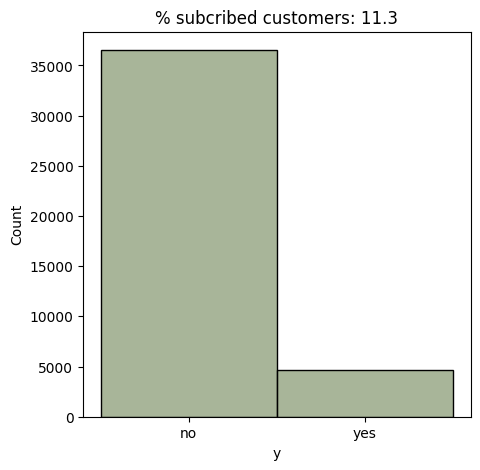

In [ ]:
title = f"% subcribed customers: {round(df_cleaned[df_cleaned['y']=='yes']['y'].count()*100/int(df_cleaned.shape[0]), 1)}"
fig = plt.figure(figsize=(5, 5))
sns.histplot(data = df_cleaned, x = target, color ="#8B9D77", label=target).set(title=title)


## 2.1. Numeric features

### 2.1.1. Distribution plots

- cons.price.idx and cons.conf.idx features are nearly symmetrical, with skewness lying between -0.5 and 0.5.
- age, emp.var.rate, euribor3m and nr.employed are slightly skewed. No special treatment needed for these features.

- The other features such as duration, campaign have high sknewness.

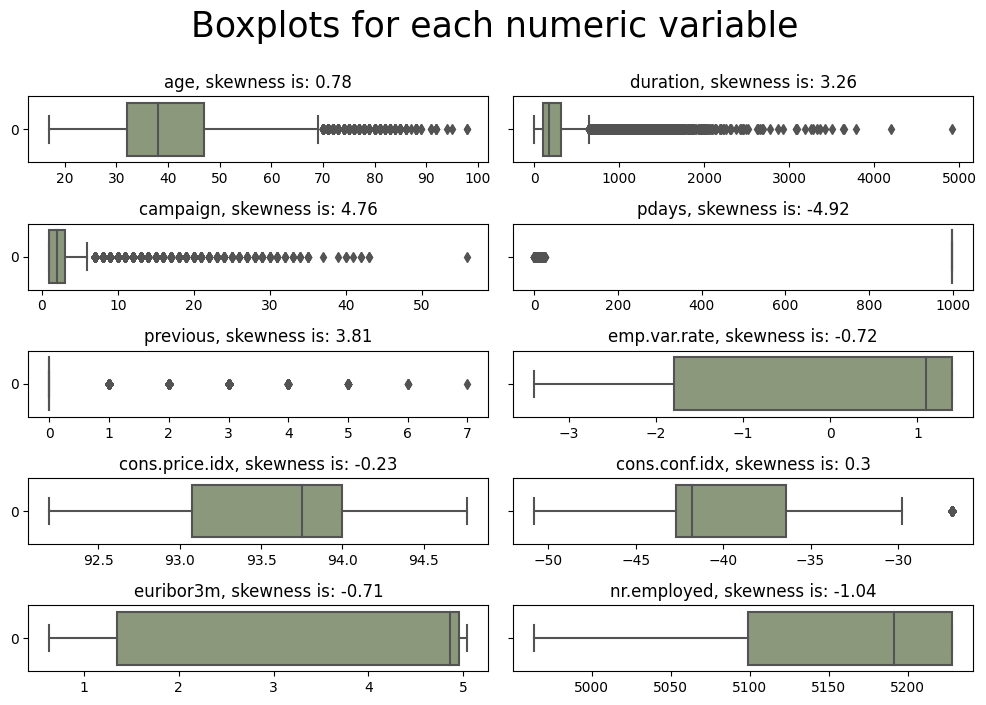

In [ ]:
# source: https://www.kaggle.com/code/marcinrutecki/how-to-create-a-meaningful-eda#3-|-Feature-Distribution

# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(10,7))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    for i, feature in enumerate(columns_list):
        sns.boxplot(data=dataset[feature], orient='h', ax=axs[i], color="#8B9D77")
        axs[i].set_title(feature + ', skewness is: '+str(round(df[feature].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=df_cleaned, columns_list=numeric_columns, rows=5, cols=2, suptitle='Boxplots for each numeric variable')
plt.tight_layout()

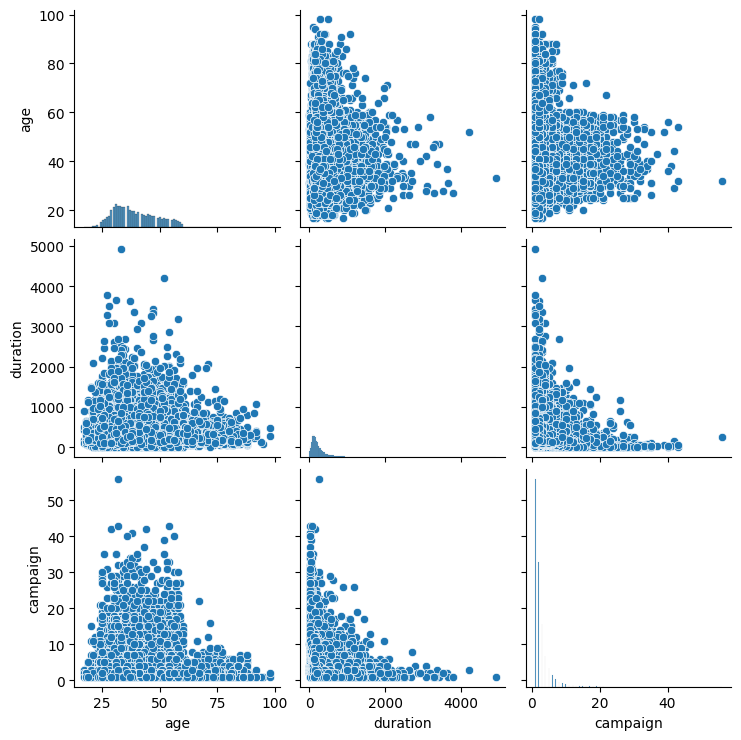

In [ ]:
numeric_features_to_plot = ['age', 'job', 'duration', 'campaign']
sns.pairplot(df_cleaned[numeric_features_to_plot])

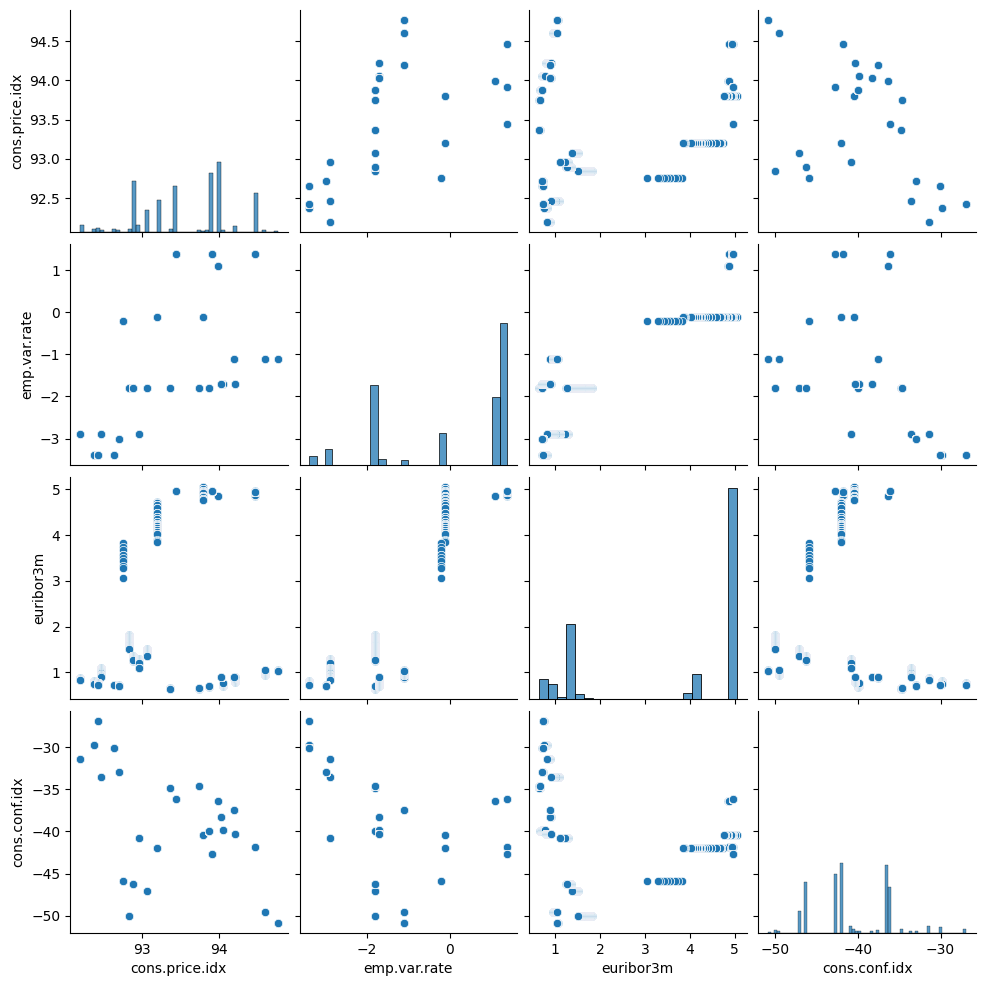

In [ ]:
sns.pairplot(df_cleaned[['cons.price.idx', 'emp.var.rate', 'euribor3m', 'cons.conf.idx']])

- nr.employed, emp.var.rate and euribor3m are highly correlated => only keep 1.

<Axes: >

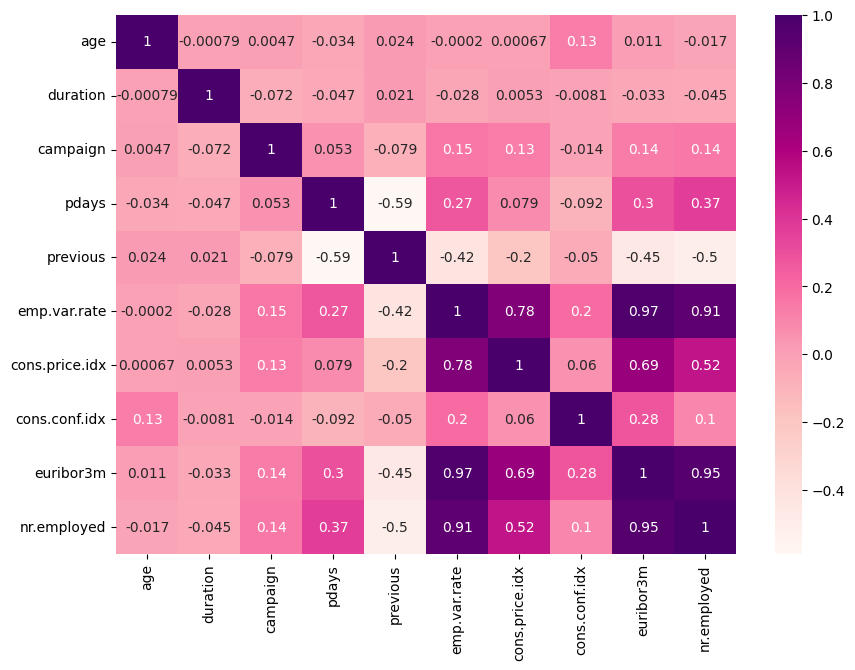

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df_cleaned[numeric_columns].corr(),cbar=True,annot=True, cmap='RdPu')

### 2.1.2. Plot the relationships between predictors and the target variable.

Some features are potential in predicting our target variable y - whether the client subscribed to a telecom plan, such as:
- Duration: users that subscribed to a telecom plan tend to have longer last contact duration compared to those who did not subscribe.
- Previous: customers that subscribed to a telecom plan who had been contacted before more times than customers who did not.


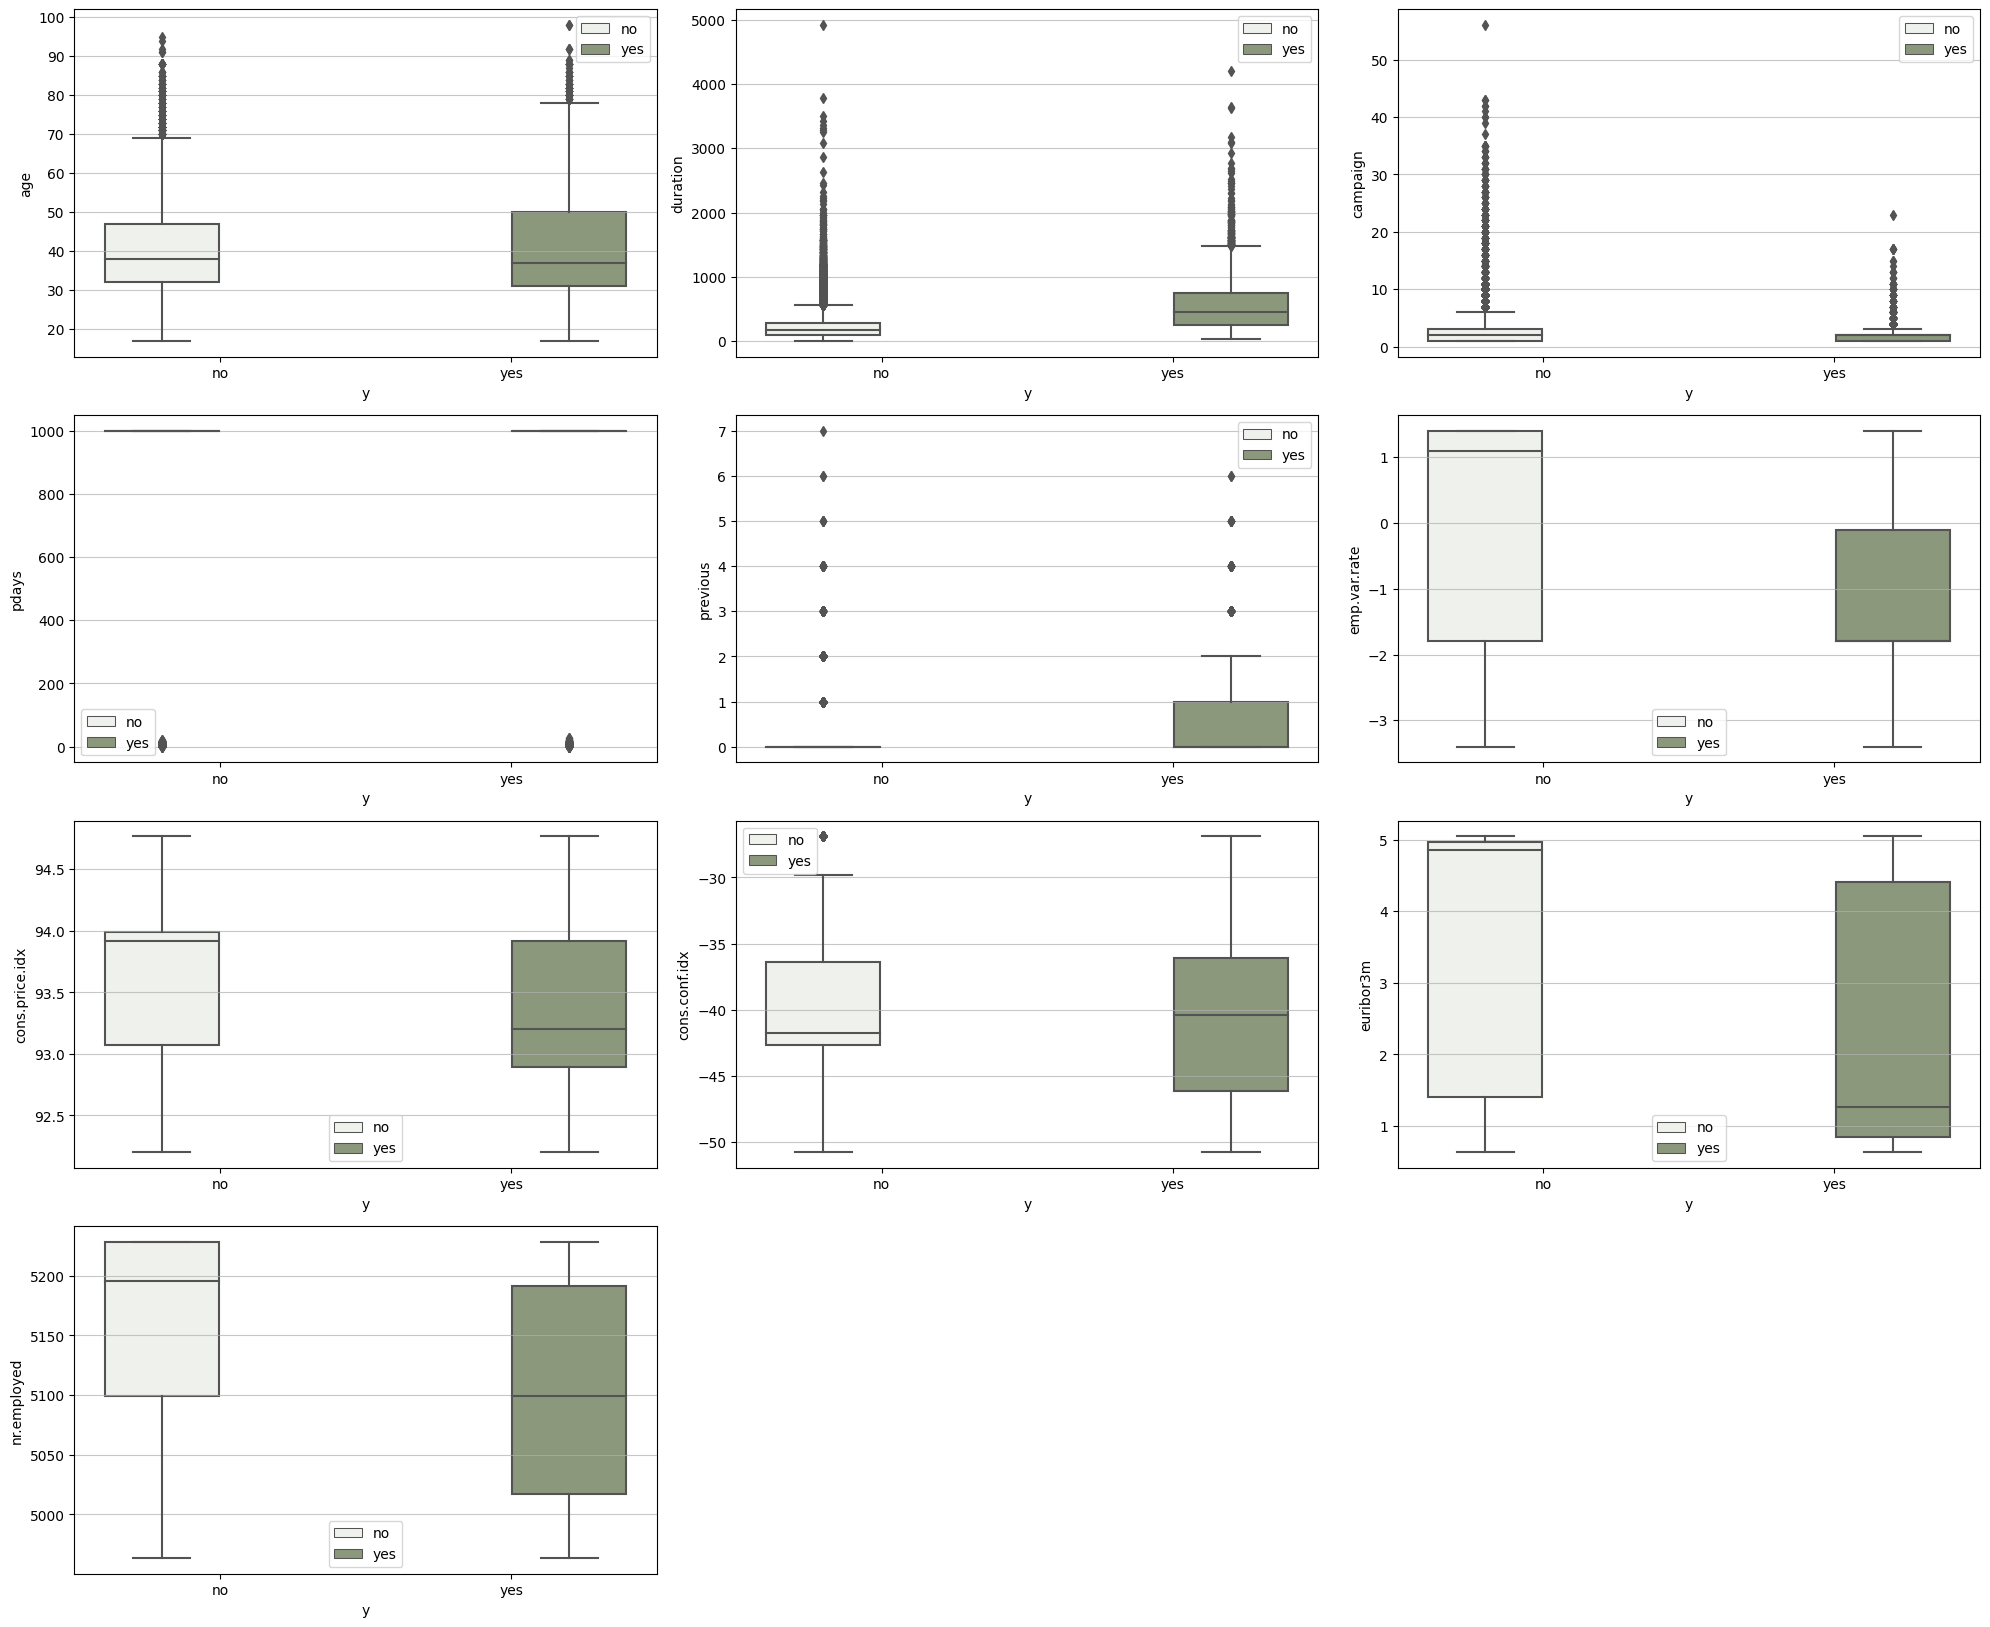

In [ ]:
# source: https://www.kaggle.com/code/marcinrutecki/how-to-create-a-meaningful-eda#3-|-Feature-Distribution

fig = plt.figure(figsize=(20, 20))
rows, cols = 5, 3
for idx, feature in enumerate(numeric_columns):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.boxplot(data=df_cleaned[[target, feature]], x=target, y=feature, hue=target, color ="#8B9D77")
    ax.set_xlabel(target)
    ax.legend()
fig.tight_layout()
fig.show()

Drop highly correlated variables.

In [ ]:
features_to_drop = ['euribor3m', 'nr.employed']
df_cleaned = df_cleaned.drop(columns=features_to_drop)

In [ ]:
for feature in features_to_drop:
    numeric_columns.remove(feature)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41168 entries, 0 to 41179
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41168 non-null  float64
 1   job             41168 non-null  object 
 2   marital         41168 non-null  object 
 3   education       41168 non-null  object 
 4   default         41168 non-null  object 
 5   housing         41168 non-null  object 
 6   loan            41168 non-null  object 
 7   contact         41168 non-null  object 
 8   month           41168 non-null  object 
 9   day_of_week     41168 non-null  object 
 10  duration        41168 non-null  float64
 11  campaign        41168 non-null  float64
 12  pdays           41168 non-null  float64
 13  previous        41168 non-null  float64
 14  poutcome        41168 non-null  object 
 15  emp.var.rate    41168 non-null  float64
 16  cons.price.idx  41168 non-null  float64
 17  cons.conf.idx   41168 non-null 

## 2.2. Categorical features

### 2.2.1. Distribution of categorical variables.

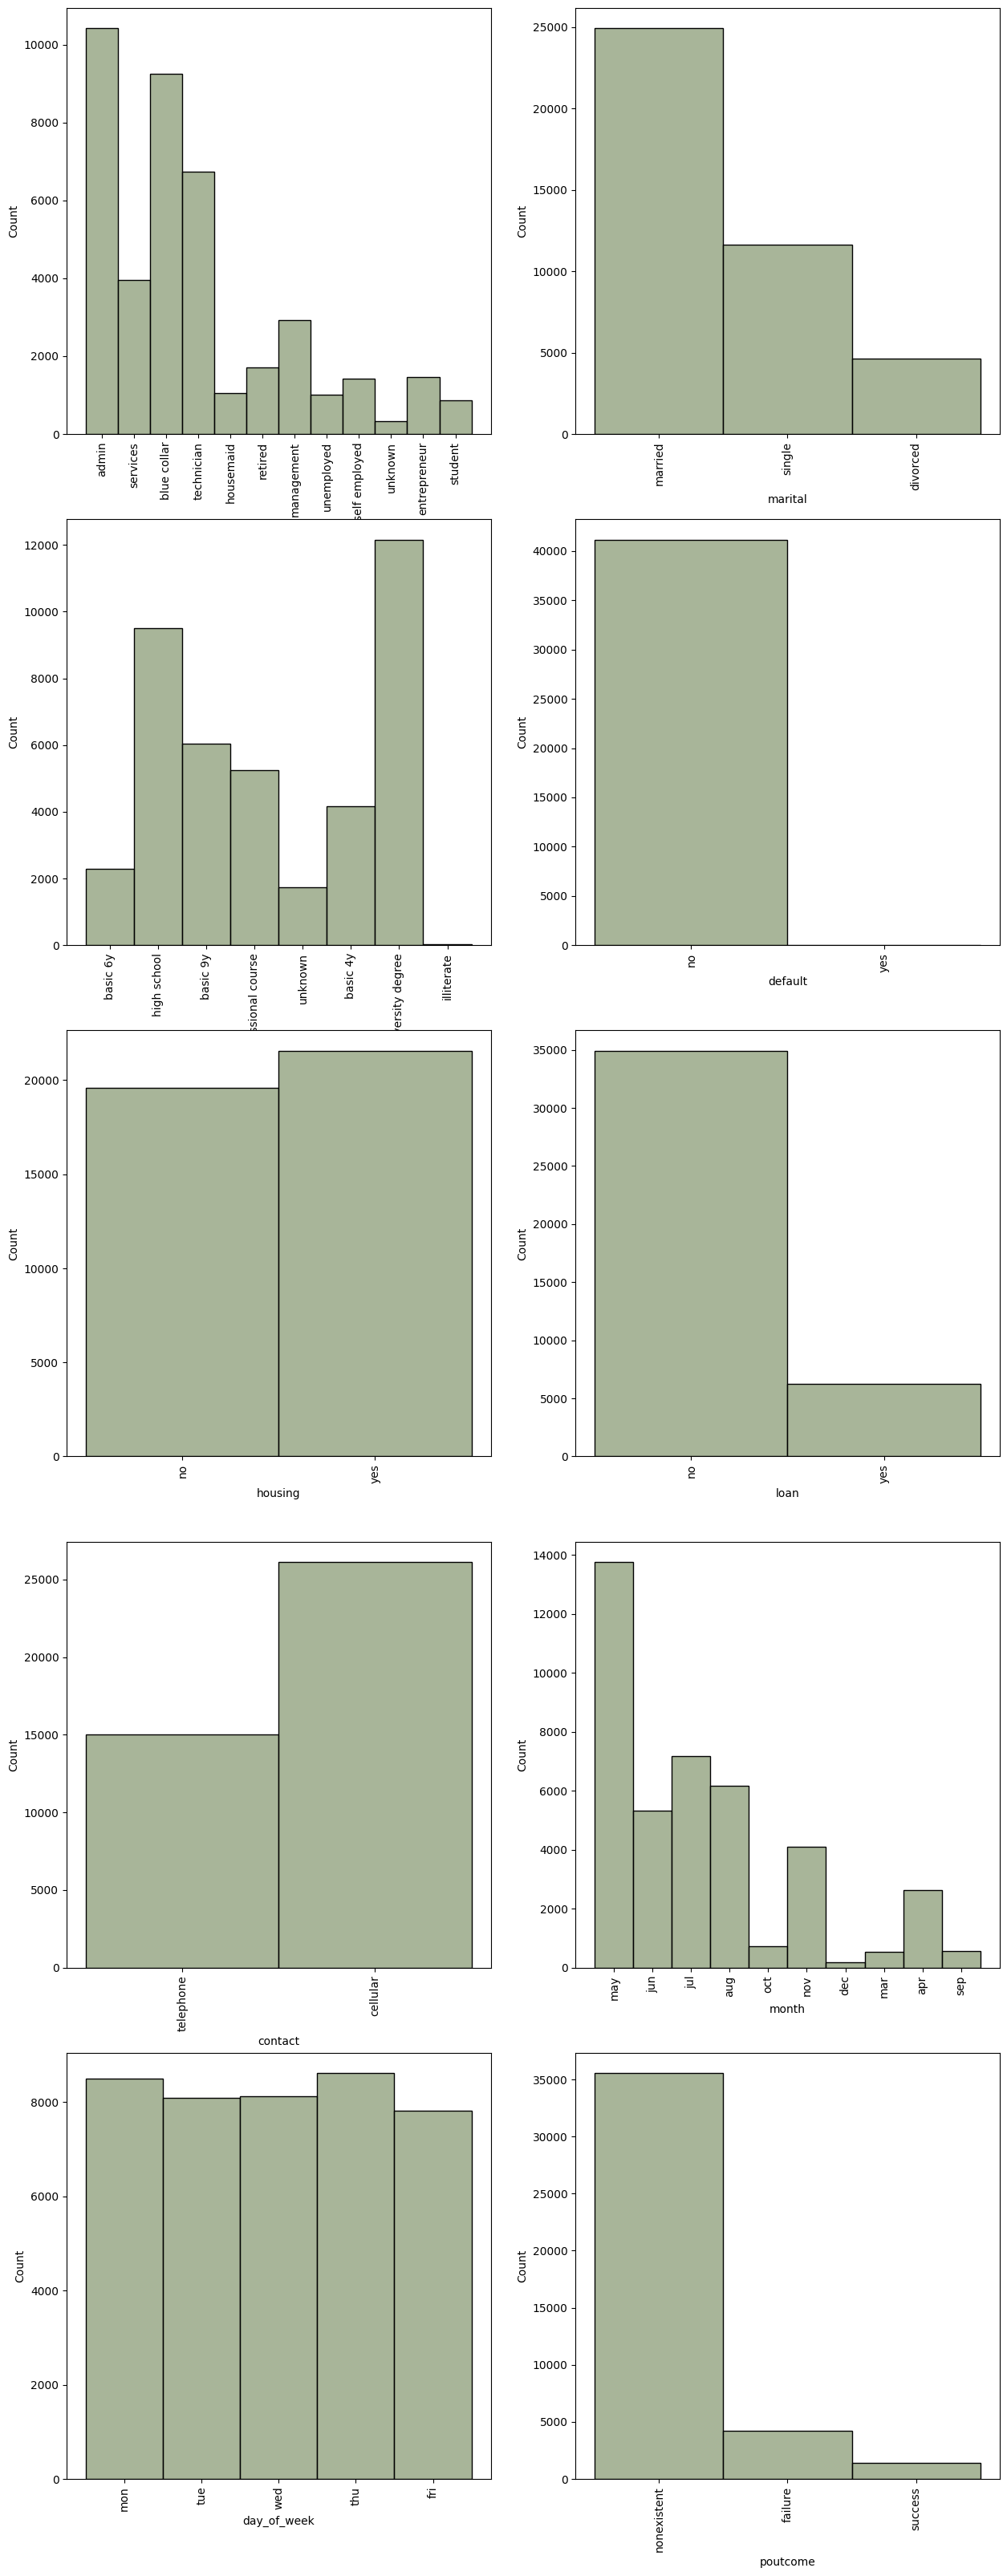

In [ ]:
fig = plt.figure(figsize=(15, 40))
rows, cols = 5, 2
for idx, feature in enumerate(categorical_features):
    ax = fig.add_subplot(rows, cols, idx+1)
    sns.histplot(df_cleaned[feature], color ="#8B9D77")
    ax.set_xlabel(feature)
    plt.xticks(rotation=90)

### 2.2.2. Plot the relationships between predictors and the target variable.

Some potential features for predicting our target variable:
- Job: retired and student customer groups have higher percentage of customers who subscribed.
- Default: most of customers who has credit in default did not subscribe.
- Poutcome: % customers subcribed of success group (people who successfully targeted in the previous campaign) is higher than the other 2 groups.

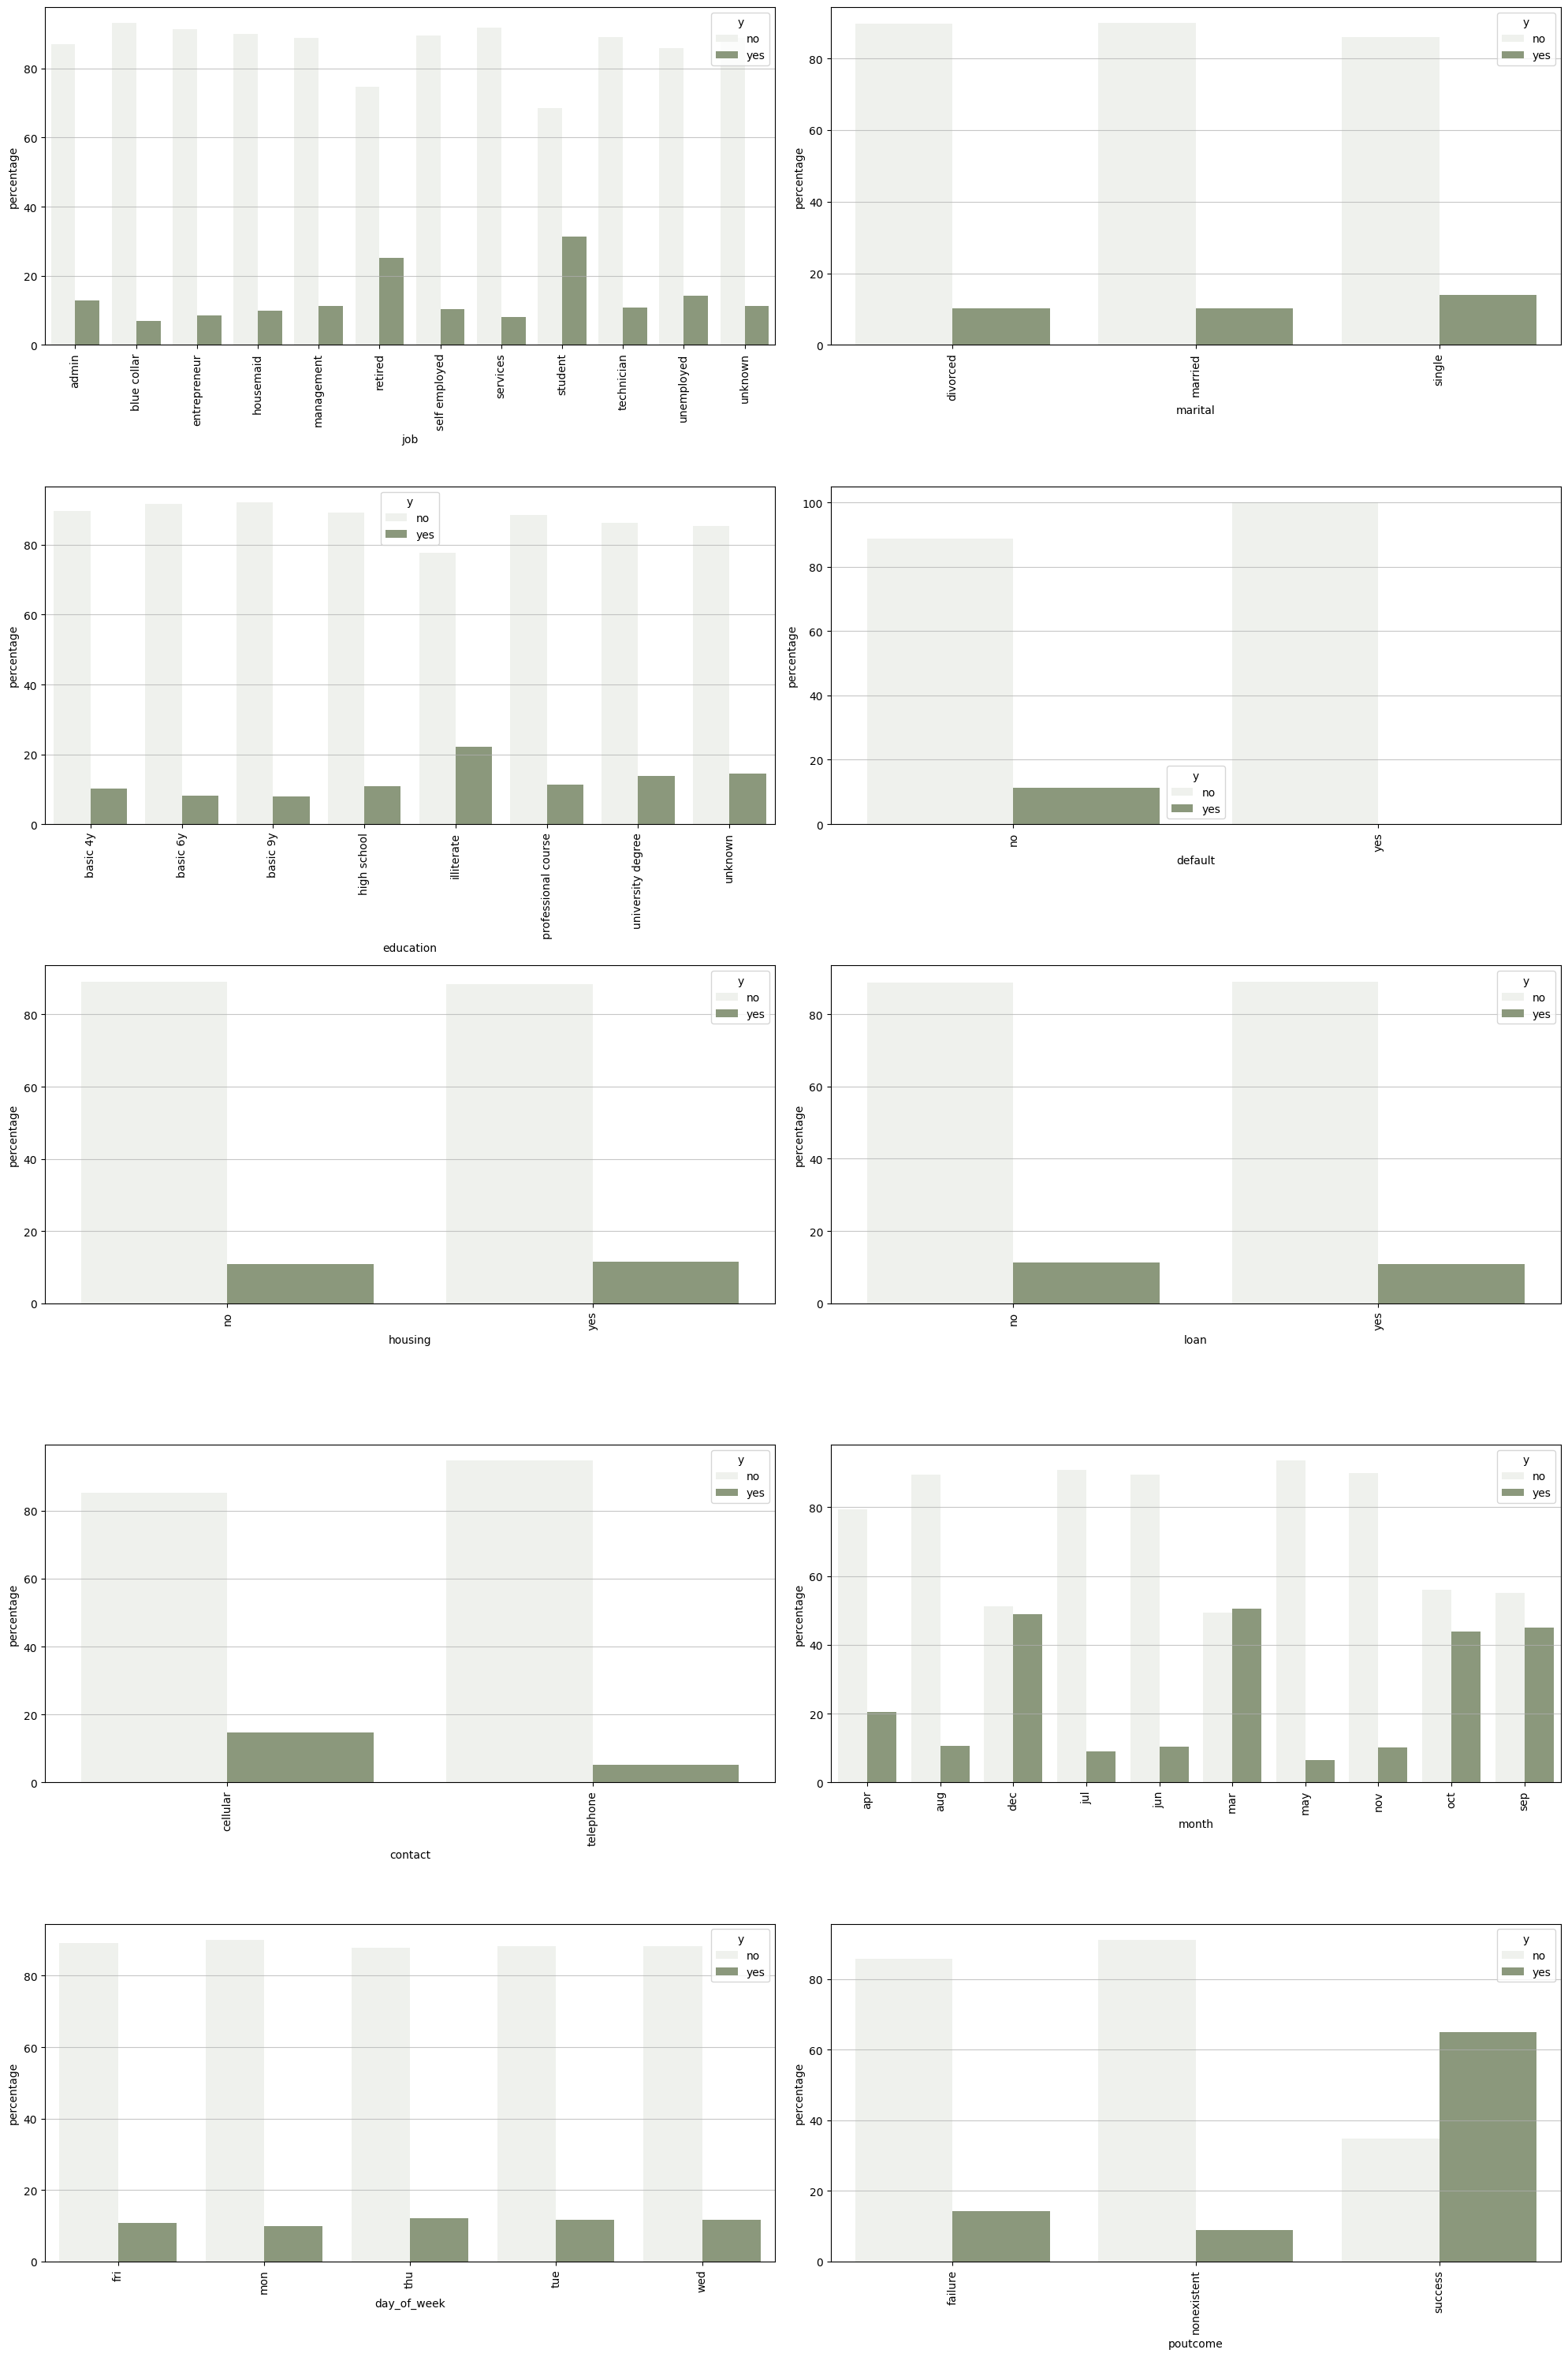

In [ ]:
# source: https://www.kaggle.com/code/marcinrutecki/how-to-create-a-meaningful-eda#3-|-Feature-Distribution

fig = plt.figure(figsize=(20, 30))
rows, cols = 5, 2
for idx, feature in enumerate(categorical_features):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    df_temp = df_cleaned.copy()
    df_temp = df_temp.groupby([feature, 'y']).agg({'age': 'count'}).rename(columns={'age': 'count'}).reset_index()
    df_total = df_temp.groupby(feature).agg({'count': 'sum'}).rename(columns={'count': 'total'}).reset_index()
    df_temp = df_temp.merge(df_total, on=feature)
    df_temp['percentage'] = df_temp['count']*100/df_temp['total']
    sns.barplot(data = df_temp, x=feature, y='percentage',  hue=target, color ="#8B9D77")
    ax.set_xlabel(feature)
    plt.xticks(rotation=90)

fig.tight_layout()
fig.show()

## 2.3. Variable transformation.

### 2.3.1. Standardize numerical variables.



In [ ]:
scaler = StandardScaler()
scaler.fit(df_cleaned[numeric_columns])
df_scaled_num = scaler.transform(df_cleaned[numeric_columns])

In [ ]:
pd.DataFrame(df_scaled_num, columns=numeric_columns).describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx
count,4.116800e+04,4.116800e+04,4.116800e+04,4.116800e+04,4.116800e+04,4.116800e+04,4.116800e+04,4.116800e+04
mean,3.546845e-17,1.020042e-16,-4.815425e-17,3.313841e-17,-3.037688e-17,-1.083902e-16,-1.209966e-14,2.057343e-16
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-2.209586e+00,-9.960993e-01,-5.659949e-01,-5.151694e+00,-3.498663e-01,-2.216466e+00,-2.375038e+00,-2.225593e+00
25%,-7.698943e-01,-6.027671e-01,-5.659949e-01,1.953292e-01,-3.498663e-01,-1.197968e+00,-8.648980e-01,-4.749851e-01
50%,-1.940176e-01,-3.019836e-01,-2.050488e-01,1.953292e-01,-3.498663e-01,6.480591e-01,2.996720e-01,-2.804730e-01
75%,6.697976e-01,2.340279e-01,1.558974e-01,1.953292e-01,-3.498663e-01,8.390275e-01,7.229950e-01,8.865991e-01
max,5.564750e+00,1.796868e+01,1.928604e+01,1.953292e-01,1.382660e+01,8.390275e-01,2.058622e+00,2.939781e+00


### 2.3.2. Encode categorical variables.

#### Target encode education


In [ ]:
education_map = {
    'illiterate': 0,
    'unknown': 0,
    'basic 4y': 1,
    'basic 6y': 2,
    'basic 9y': 3,
    'high school': 4,
    'professional course': 5,
    'university degree': 6
}
df_cleaned['education'].replace(education_map, inplace=True)

In [ ]:
df_cleaned['education'].head(5)

0    2
1    4
2    3
3    5
4    0
Name: education, dtype: int64

#### Convert binary features to int.

In [ ]:
binary_features = [
    'default',
    'housing',
    'loan'
]
for feature in binary_features:
    binary = {
        'no': False,
        'yes': True
    }
    df_cleaned[feature].replace(binary, inplace=True)
    df_cleaned[feature] = df_cleaned[feature].astype(int)

In [ ]:
df_cleaned[binary_features].head(5)

,default,housing,loan
0,0,0,0
1,0,0,1
2,0,0,0
3,0,0,0
4,0,0,0


#### One hot encode the remaining categorical features.

In [ ]:
one_hot = [
    'job',
    'marital',
    'contact',
    'poutcome'
]
df_one_hot = pd.get_dummies(df_cleaned[one_hot])

In [ ]:
df_cleaned['y'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df_cleaned[target] = df_cleaned[target].replace({'no': 0, 'yes': 1})

In [ ]:
df_final = pd.concat([df_cleaned['education'], df_cleaned[binary_features], df_cleaned[numeric_columns], df_one_hot, df_cleaned[target]], axis=1)

In [ ]:
df_final.sample(5)

,education,default,housing,loan,age,duration,campaign,pdays,previous,emp.var.rate,...,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,y
7827,6,0,0,1,47.0,67.0,2.0,999.0,0.0,1.4,...,0,0,0,1,0,1,0,1,0,0
18016,3,0,0,0,49.0,39.0,1.0,999.0,0.0,1.4,...,0,1,0,0,1,0,0,1,0,0
25392,3,0,0,0,34.0,106.0,1.0,999.0,0.0,-0.1,...,0,0,1,0,1,0,0,1,0,0
39858,6,0,1,0,27.0,262.0,3.0,999.0,0.0,-1.7,...,0,0,1,0,1,0,0,1,0,0
32963,4,0,1,0,44.0,246.0,1.0,999.0,0.0,-1.8,...,0,0,1,0,1,0,0,1,0,0


In [ ]:
df_final.to_csv('datasets/classification__marketing_campaigns.csv', index=False)